In [19]:
import networkx as nx
from BayesNet import BayesNet
from BNReasoner import BNReasoner


In [6]:
net = BayesNet()
net.load_from_bifxml('./testing/dog_problem.BIFXML')

In [7]:
reasoner = BNReasoner(net)

In [10]:
net.get_all_variables()

['light-on', 'bowel-problem', 'dog-out', 'hear-bark', 'family-out']

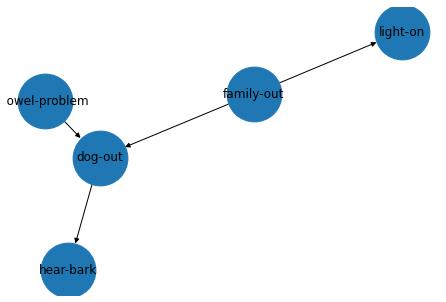

In [28]:
net.draw_structure()

In [34]:
graph = net.get_interaction_graph()

In [29]:
net.get_children('light-on')

[]

In [31]:
net.get_children('dog-out')

['hear-bark']

In [36]:
for x in nx.all_shortest_paths(graph, 'family-out', 'hear-bark'):
    print(x)

['family-out', 'dog-out', 'hear-bark']


In [37]:
for x in nx.all_shortest_paths(graph, 'light-on', 'hear-bark'):
    print(x)

['light-on', 'family-out', 'dog-out', 'hear-bark']


In [57]:
Z = ['family-out']

for path_list in nx.all_shortest_paths(graph, 'light-on', 'hear-bark'):
    path_length = len(path_list)
    for i in range(path_length-1):
        if path_list[i+1] in net.get_children(path_list[i]):
            # causal chain
            pass
        elif path_list[i+1] in Z:
            # common effect
            print(f'Common Effect at {path_list[i+1]}: d-seperated')
            break
        else:
            # d-seperated
            print('d-separated')
            break    

Common Effect at family-out: d-seperated


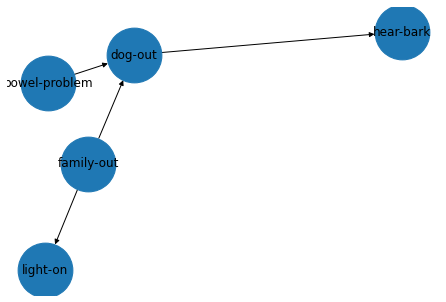

In [60]:
net.draw_structure()

In [61]:
Z = ['family-out']
Z = []
def check_d_separation():
    for path_list in nx.all_shortest_paths(graph, 'light-on', 'hear-bark'):
        path_length = len(path_list)
        if path_length < 3:
            if path_length < 2:
                return True
            elif path_length == 2:
                if path_list[0] in Z or path_list[1] in Z:
                    return True
                else:
                    return False

        d_separated = False 

        for i in range(path_length-2):
            # check triplets
            tr_1 = path_list[i]
            tr_2 = path_list[i+1]
            tr_3 = path_list[i+2]


            if tr_2 in net.get_children(tr_1) and tr_3 in net.get_children(tr_2):
                #causal chain
                if tr_2 in Z:
                    print('causal chain: d-separated')
                    d_separated = True
                    break


            if tr_1 in net.get_children(tr_2) and tr_3 in net.get_children(tr_2):
                # common cause
                if tr_2 in Z:
                    print('common cause: d-separated')
                    d_separated = True
                    break

            if tr_2 in net.get_children(tr_1) and tr_2 in net.get_children(tr_3):
                if tr_2 not in Z:
                    print('common effect: d-separated')
                    d_separated = True
                    break 


        if d_separated is False:
            print('Causal Path found')
            return False


    return True




In [62]:
check_d_separation()

False